In [ ]:
import os

# Specify the path to the directory
dataset_path = r"D:\ISL" 

words = os.listdir(datset_path)
# List all files and directories in the specified path
words_path = [os.path.join(dataset_path, item) for item in os.listdir(dataset_path)]

print(words_path)

['D:\\ISL\\Actor', 'D:\\ISL\\Adult', 'D:\\ISL\\Afternoon', 'D:\\ISL\\alive', 'D:\\ISL\\Alright', 'D:\\ISL\\Animal', 'D:\\ISL\\Artist', 'D:\\ISL\\Attack', 'D:\\ISL\\Author', 'D:\\ISL\\Baby', 'D:\\ISL\\bad', 'D:\\ISL\\Bag', 'D:\\ISL\\Ball', 'D:\\ISL\\Bank', 'D:\\ISL\\Bathroom', 'D:\\ISL\\Beautiful', 'D:\\ISL\\Bed', 'D:\\ISL\\Bedroom', 'D:\\ISL\\Bicycle', 'D:\\ISL\\big_large', 'D:\\ISL\\Bill', 'D:\\ISL\\Bird', 'D:\\ISL\\Black', 'D:\\ISL\\Blind', 'D:\\ISL\\Blue', 'D:\\ISL\\Boat', 'D:\\ISL\\Book', 'D:\\ISL\\Box', 'D:\\ISL\\Boy', 'D:\\ISL\\Brother', 'D:\\ISL\\Brown', 'D:\\ISL\\Bus', 'D:\\ISL\\Camera', 'D:\\ISL\\Car', 'D:\\ISL\\Card', 'D:\\ISL\\Cat', 'D:\\ISL\\Cell_phone', 'D:\\ISL\\Chair', 'D:\\ISL\\cheap', 'D:\\ISL\\Child', 'D:\\ISL\\City', 'D:\\ISL\\clean', 'D:\\ISL\\Clock', 'D:\\ISL\\Clothing', 'D:\\ISL\\cold', 'D:\\ISL\\Colour', 'D:\\ISL\\Computer', 'D:\\ISL\\cool', 'D:\\ISL\\Court', 'D:\\ISL\\Cow', 'D:\\ISL\\Crowd', 'D:\\ISL\\curved', 'D:\\ISL\\Daughter', 'D:\\ISL\\dead', 'D:\\ISL\\Deaf

In [ ]:
# Creating a dictionary of words, which correspond to the list of path of videos of that word

data_dict = {}
for n,i in enumerate(words):
    path = words_path[n]
    # path_t = test_words_path[n]
    list_vid_train = [os.path.join(path, item) for item in os.listdir(path)]
    # list_vid_test = [os.path.join(path_t, item) for item in os.listdir(path_t)]
    data_dict[i] =  list_vid_train # + list_vid_test

In [ ]:
def words_and_idx(path):
    words = os.listdir(path)
    words_list = []
    for word in words:
        words_list.append(word)

    words_dict = dict({})
    for num, word in enumerate(words_list):
        words_dict[word] = num

    return words_list, words_dict

idx_to_word, word_to_idx = words_and_idx(r"D:\ISL")

In [ ]:
len(idx_to_word)

262

In [ ]:
import os
import numpy as np

# splitting the dataset
def random_split(data_dict, train_ratio=0.8, seed=42):
    np.random.seed(seed)
    train_data = []
    test_data = []

    for label, paths in data_dict.items():
        # Shuffle the paths
        paths = np.array(paths)
        np.random.shuffle(paths)

        # Split into training and testing
        split_idx = int(len(paths) * train_ratio)
        train_paths = paths[:split_idx].tolist()
        test_paths = paths[split_idx:].tolist()

        # Append the paths with their labels
        train_data.extend([(path, word_to_idx[label]) for path in train_paths])
        test_data.extend([(path, word_to_idx[label]) for path in test_paths])

    return train_data, test_data

In [ ]:
train, test = random_split(data_dict, train_ratio=0.8, seed=123)
print("Train paths:", train)
print("Test paths:", test)

Train paths: [('D:\\ISL\\Actor\\MVI_5371.MOV', 0), ('D:\\ISL\\Actor\\MVI_5374.MOV', 0), ('D:\\ISL\\Actor\\MVI_4791.MOV', 0), ('D:\\ISL\\Actor\\MVI_4516.MOV', 0), ('D:\\ISL\\Actor\\MVI_4792.MOV', 0), ('D:\\ISL\\Actor\\MVI_5373.MOV', 0), ('D:\\ISL\\Actor\\MVI_5372.MOV', 0), ('D:\\ISL\\Actor\\MVI_8921.MP4', 0), ('D:\\ISL\\Actor\\MVI_4519.MOV', 0), ('D:\\ISL\\Actor\\MVI_4517.MOV', 0), ('D:\\ISL\\Actor\\MVI_4793.MOV', 0), ('D:\\ISL\\Adult\\MVI_4121.MOV', 1), ('D:\\ISL\\Adult\\MVI_4994.MOV', 1), ('D:\\ISL\\Adult\\MVI_3973.MOV', 1), ('D:\\ISL\\Adult\\MVI_4119.MOV', 1), ('D:\\ISL\\Adult\\MVI_5296.MOV', 1), ('D:\\ISL\\Adult\\MVI_3825.MOV', 1), ('D:\\ISL\\Adult\\MVI_5141.MOV', 1), ('D:\\ISL\\Adult\\MVI_4120.MOV', 1), ('D:\\ISL\\Adult\\MVI_3824.MOV', 1), ('D:\\ISL\\Adult\\MVI_4996.MOV', 1), ('D:\\ISL\\Adult\\MVI_4995.MOV', 1), ('D:\\ISL\\Adult\\MVI_8647.MP4', 1), ('D:\\ISL\\Adult\\MVI_3972.MOV', 1), ('D:\\ISL\\Adult\\MVI_3971.MOV', 1), ('D:\\ISL\\Adult\\MVI_5298.MOV', 1), ('D:\\ISL\\Adult\\MVI_52

In [ ]:
len(train), len(test)

(3344, 940)

In [ ]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
from torchvision import models
from torchvision.transforms.functional import to_tensor
# from torch.amp import autocast, GradScaler
from torch.utils.data import Dataset, DataLoader

import os
import numpy as np
import subprocess
from PIL import Image
import shutil
import mediapipe as mp
import numpy as np
import cv2
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [ ]:
device = 'cuda'

In [ ]:
def show_sequence(sequence, NUM_FRAMES):
    columns = 4
    rows = (NUM_FRAMES + 1) // (columns)
    fig = plt.figure(figsize=(32, (16 // columns) * rows))
    gs = gridspec.GridSpec(rows, columns)
    for j in range(rows * columns):
        plt.subplot(gs[j])
        plt.axis("off")
        frames = sequence[j].permute(1,2,0).numpy()
        frames = frames/ frames.max()
        plt.imshow(frames)

    plt.show()

In [ ]:
# tag : v5.1
# Added augmentation
# Use it if you want to return only the kneypoints instead of images of the videos, it can be used to train transformer

class VideoDataset(Dataset):
    def __init__(self, data, temp_data_folder, NUM_FRAMES=10, transform_frame=None,transform_video=None, video_fps=25, resolution='1920:1080', flip_prob=30):
        self.data = data  # It should be a list of tuples where data[0] is the path to the video and data[1] is the label

        self.transform_frame = transform_frame  # Transformations to be done on the individual frames.
                                                # Recommended to use when transforms is required at frames level with some randomness, eg: Random Crop
                                                # Note: If the Dataset is showing tensor issue, try adding `ToTensor()` in transform.

        self.transform_video = transform_video  # Transformations to be done on the whole video.
                                                # Recommended to use when transforms is required at video level with some randomness, eg: Random Horizontal Flip

        self.NUM_FRAMES = NUM_FRAMES  # Number of frames to be extracted from the video

        self.fps = video_fps  # The fps at which the video will be saved by ffmpeg
                              # Note: Reducing this might give a small performance increase, which might add up when running it multiple times. But this will also lead to
                              # loss of some data, as some frames will be dropped by ffmpeg

        self.resolution = resolution  # resolution at which ffmpeg will save the frames (could be the same as the video or different).
                                      # Note: Reducing this might give a small performance increase, which might add up when running it multiple times.

        self.temp_data_folder = temp_data_folder  # A temporary folder where ffmpeg can store the frames of the video
                                                  # NOTE: this folder is recommended to be empty as frames get deleted from the folder after they are loaded as tensor!!

        self.flip_prob = flip_prob


    def landmark_to_list(self, landmarks):
        x, y =[], []
        for landmark in landmarks:
            x.append(landmark.x)
            y.append(landmark.y)
        return x, y


    def swap(self, left_thumb, right_thumb, hand):
        left = (left_thumb[0]-hand[0])**2 + (left_thumb[1]-hand[1])**2
        right = (right_thumb[0]-hand[0])**2 + (right_thumb[1]-hand[1])**2

        if right<left:
            return True
        return False


    def process_and_convert(self, image_path, flip):

        # Initialize MediaPipe modules
        mp_pose = mp.solutions.pose
        mp_hands = mp.solutions.hands
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing_styles = mp.solutions.drawing_styles

        # Load the image
        rgb_image = Image.open(image_path)

        with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose, \
            mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:

            # Convert the BGR image to RGB
            if rgb_image.mode != 'RGB':
                rgb_image = rgb_image.convert('RGB')

            transform = transforms.RandomHorizontalFlip(p=1)
            if flip:
                rgb_image = transform(rgb_image)

            if self.transform_frame:
                rgb_image = self.transform_frame(rgb_image)

            rgb_image = np.array(rgb_image)

            # Process pose landmarks
            pose_results = pose.process(rgb_image)
            x_pose, y_pose = self.landmark_to_list(pose_results.pose_landmarks.landmark[:25])


            # Process hand landmarks
            hand_results = hands.process(rgb_image)
            if hand_results.multi_hand_landmarks:
                if len(hand_results.multi_hand_landmarks) > 0 and hand_results.multi_hand_landmarks[0] != None:
                    x_left_hand, y_left_hand = self.landmark_to_list(hand_results.multi_hand_landmarks[0].landmark)
                else:
                    x_left_hand, y_left_hand = [np.nan]*21, [np.nan]*21

                if len(hand_results.multi_hand_landmarks) > 1 and hand_results.multi_hand_landmarks[1] != None:
                    x_right_hand, y_right_hand = self.landmark_to_list(hand_results.multi_hand_landmarks[1].landmark)
                else:
                    x_right_hand, y_right_hand = [np.nan]*21, [np.nan]*21

                    if self.swap(left_thumb=(x_pose[21], y_pose[21]), right_thumb=(x_pose[22], y_pose[22]), hand=(x_left_hand[1], y_left_hand[1])):
                        x_left_hand, y_left_hand, x_right_hand, y_right_hand = x_right_hand, y_right_hand, x_left_hand, y_left_hand

            else:
                x_left_hand, y_left_hand = [np.nan]*21, [np.nan]*21
                x_right_hand, y_right_hand = [np.nan]*21, [np.nan]*21


            return x_left_hand, y_left_hand, x_pose, y_pose, x_right_hand, y_right_hand


    def interpolate(self, arr):

        arr_x = arr[:, :, 0]
        arr_x = pd.DataFrame(arr_x)
        arr_x = arr_x.interpolate(method="linear", limit_direction="both").to_numpy()

        arr_y = arr[:, :, 1]
        arr_y = pd.DataFrame(arr_y)
        arr_y = arr_y.interpolate(method="linear", limit_direction="both").to_numpy()

        if np.count_nonzero(~np.isnan(arr_x)) == 0:
            arr_x = np.zeros(arr_x.shape)
        if np.count_nonzero(~np.isnan(arr_y)) == 0:
            arr_y = np.zeros(arr_y.shape)

        result = np.stack((arr_x, arr_y), axis=-1)
        return result

    def np_to_tensor(self, left_hand, right_hand, pose):
        landmark_list = []
        for n in range(self.NUM_FRAMES):
            x = np.concatenate((left_hand[0][n], pose[0][n], right_hand[0][n]))
            y = np.concatenate((left_hand[1][n], pose[1][n], right_hand[1][n]))
            result = np.stack((x,y))
            landmark_list.append(torch.from_numpy(result))
        landmark_tensor = torch.stack(landmark_list)
        landmark_tensor = landmark_tensor.clone().detach().to(torch.float32)
        return landmark_tensor

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        video_path = self.data[idx][0]
        video_file_name = os.path.basename(video_path)  # Assigns the name of the video to the variable
        output_video_path = os.path.join(self.temp_data_folder, video_file_name)  # creating a temp path in the temp_folder for saaving the frames of the video
        os.makedirs(output_video_path, exist_ok=True)  # Creating a folder with the name of the video in the temp_data_folder to save the frames of the video

        # Command to convert the video to frames
        fallback_cmd = [
                    'ffmpeg',
                    '-i', video_path,
                    '-vf', f'fps={self.fps},scale={self.resolution},format=yuv420p',
                    '-q:v', '2',
                    os.path.join(output_video_path, 'img_%05d.jpg')
        ]
        subprocess.run(fallback_cmd, check=True, stderr=subprocess.PIPE)

        video_frames = []
        left_hand, right_hand, pose = [[],[]], [[],[]], [[],[]]

        if np.random.randint(low=1, high=100, size=None, dtype=int) <= self.flip_prob:
            flip=True
        else:
            flip=False

        video_images = os.listdir(output_video_path)

        # Setting variables for the range in for loop
        starting_frame = 0
        step_size = len(video_images)//self.NUM_FRAMES
        ending_frame = len(video_images)-len(video_images)%self.NUM_FRAMES  # Subtraction to remove the remainder so that we run the for loop extra

        # Selecting the NUM_FRAMES from the video
        for n in range(starting_frame, ending_frame, step_size):
            img = video_images[n]
            img_path = os.path.join(output_video_path, img)

            x_left_hand, y_left_hand, x_pose, y_pose, x_right_hand, y_right_hand = self.process_and_convert(img_path, flip)
            left_hand[0].append(x_left_hand)
            left_hand[1].append(y_left_hand)
            right_hand[0].append(x_right_hand)
            right_hand[1].append(y_right_hand)
            pose[0].append(x_pose)
            pose[1].append(y_pose)

        left_hand= np.array(left_hand).transpose(1,2,0)
        right_hand = np.array(right_hand).transpose(1, 2, 0)
        pose = np.array(pose).transpose(1, 2, 0)

        left_hand = self.interpolate(left_hand)
        right_hand = self.interpolate(right_hand)
        pose = self.interpolate(pose)

        # Transpose back to the original shape
        left_hand = left_hand.transpose(2, 0, 1)
        right_hand = right_hand.transpose(2, 0, 1)
        pose = pose.transpose(2, 0, 1)
        tensor_landmarks = self.np_to_tensor(left_hand, right_hand, pose)
        label = self.data[idx][1]
        return tensor_landmarks, label

In [ ]:
# tag : v5.2
# Added: plotting of landamrks
# Use this if you want to return images of the video

class VideoDataset(Dataset):
    def __init__(self, data, temp_data_folder, NUM_FRAMES=10, transform_frame=None,transform_video=None, video_fps=25, resolution='1920:1080', flip_prob=30, resize=580, crop=720):
        self.data = data  # It should be a list of tuples where data[0] is the path to the video and data[1] is the label

        self.transform_frame = transform_frame  # Transformations to be done on the individual frames.
                                                # Recommended to use when transforms is required at frames level with some randomness, eg: Random Crop
                                                # Note: If the Dataset is showing tensor issue, try adding `ToTensor()` in transform.

        self.transform_video = transform_video  # Transformations to be done on the whole video.
                                                # Recommended to use when transforms is required at video level with some randomness, eg: Random Horizontal Flip

        self.NUM_FRAMES = NUM_FRAMES  # Number of frames to be extracted from the video

        self.fps = video_fps  # The fps at which the video will be saved by ffmpeg
                              # Note: Reducing this might give a small performance increase, which might add up when running it multiple times. But this will also lead to
                              # loss of some data, as some frames will be dropped by ffmpeg

        self.resolution = resolution  # resolution at which ffmpeg will save the frames (could be the same as the video or different).
                                      # Note: Reducing this might give a small performance increase, which might add up when running it multiple times.

        self.temp_data_folder = temp_data_folder  # A temporary folder where ffmpeg can store the frames of the video
                                                  # NOTE: this folder is recommended to be empty as frames get deleted from the folder after they are loaded as tensor!!

        self.flip_prob = flip_prob

        self.frame_width = np.fromstring(resolution, sep=":")[0]
        self.frame_length = np.fromstring(resolution, sep=":")[1]
        self.rescale = transforms.Resize((resize,resize))
        self.crop = transforms.CenterCrop((crop,crop))

    def landmark_to_list(self, landmarks):
        x, y =[], []
        for landmark in landmarks:
            x.append(landmark.x)
            y.append(landmark.y)
        return x, y


    def swap(self, left_thumb, right_thumb, hand):
        left = (left_thumb[0]-hand[0])**2 + (left_thumb[1]-hand[1])**2
        right = (right_thumb[0]-hand[0])**2 + (right_thumb[1]-hand[1])**2

        if right<left:
            return True
        return False


    def process_and_convert(self, image_path, flip):

        # Initialize MediaPipe modules
        mp_pose = mp.solutions.pose
        mp_hands = mp.solutions.hands
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing_styles = mp.solutions.drawing_styles

        # Load the image
        rgb_image = Image.open(image_path)

        with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose, \
            mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:

            # Convert the BGR image to RGB
            if rgb_image.mode != 'RGB':
                rgb_image = rgb_image.convert('RGB')

            transform = transforms.RandomHorizontalFlip(p=1)
            if flip:
                rgb_image = transform(rgb_image)

            if self.transform_frame:
                rgb_image = self.transform_frame(rgb_image)

            rgb_image = np.array(rgb_image)

            # Process pose landmarks
            pose_results = pose.process(rgb_image)
            x_pose, y_pose = self.landmark_to_list(pose_results.pose_landmarks.landmark[:25])


            # Process hand landmarks
            hand_results = hands.process(rgb_image)
            if hand_results.multi_hand_landmarks:
                if len(hand_results.multi_hand_landmarks) > 0 and hand_results.multi_hand_landmarks[0] != None:
                    x_left_hand, y_left_hand = self.landmark_to_list(hand_results.multi_hand_landmarks[0].landmark)
                else:
                    x_left_hand, y_left_hand = [np.nan]*21, [np.nan]*21

                if len(hand_results.multi_hand_landmarks) > 1 and hand_results.multi_hand_landmarks[1] != None:
                    x_right_hand, y_right_hand = self.landmark_to_list(hand_results.multi_hand_landmarks[1].landmark)
                else:
                    x_right_hand, y_right_hand = [np.nan]*21, [np.nan]*21

                    if self.swap(left_thumb=(x_pose[21], y_pose[21]), right_thumb=(x_pose[22], y_pose[22]), hand=(x_left_hand[1], y_left_hand[1])):
                        x_left_hand, y_left_hand, x_right_hand, y_right_hand = x_right_hand, y_right_hand, x_left_hand, y_left_hand

            else:
                x_left_hand, y_left_hand = [np.nan]*21, [np.nan]*21
                x_right_hand, y_right_hand = [np.nan]*21, [np.nan]*21


            return x_left_hand, y_left_hand, x_pose, y_pose, x_right_hand, y_right_hand






    def interpolate(self, arr):

        arr_x = arr[:, :, 0]
        arr_x = pd.DataFrame(arr_x)
        arr_x = arr_x.interpolate(method="linear", limit_direction="both").to_numpy()

        arr_y = arr[:, :, 1]
        arr_y = pd.DataFrame(arr_y)
        arr_y = arr_y.interpolate(method="linear", limit_direction="both").to_numpy()

        if np.count_nonzero(~np.isnan(arr_x)) == 0:
            arr_x = np.zeros(arr_x.shape)
        if np.count_nonzero(~np.isnan(arr_y)) == 0:
            arr_y = np.zeros(arr_y.shape)

        arr_x = arr_x * self.frame_width
        arr_y = arr_y * self.frame_length

        result = np.stack((arr_x, arr_y), axis=-1)
        return result




    # def interpolate(self, arr, thumb_coords=None):
    #     """
    #     Interpolates missing hand landmarks, optionally considering thumb coordinates detected by pose detection.

    #     Parameters:
    #     arr (numpy.ndarray): Hand landmarks array of shape (num_frames, num_landmarks, 2).
    #     thumb_coords (numpy.ndarray or None): Thumb coordinates array of shape (num_frames, 2).

    #     Returns:
    #     numpy.ndarray: Interpolated hand landmarks array of shape (num_frames, num_landmarks, 2).
    #     """
    #     # Extract x and y coordinates
    #     arr_x = arr[:, :, 0]
    #     arr_y = arr[:, :, 1]

    #     # If thumb coordinates are provided, add them as reference points
    #     if thumb_coords is not None:
    #         thumb_x, thumb_y = thumb_coords[:, 0], thumb_coords[:, 1]

    #         # Replace NaNs in hand landmarks with thumb coordinates for interpolation
    #         arr_x = np.where(np.isnan(arr_x), np.expand_dims(thumb_x, axis=1), arr_x)
    #         arr_y = np.where(np.isnan(arr_y), np.expand_dims(thumb_y, axis=1), arr_y)

    #     # Interpolate x and y coordinates
    #     arr_x = pd.DataFrame(arr_x).interpolate(method="polynomial",order=5, limit_direction="both").to_numpy()
    #     arr_y = pd.DataFrame(arr_y).interpolate(method="polynomial", order=5, limit_direction="both").to_numpy()

    #     # Handle cases where all values are NaN
    #     if np.count_nonzero(~np.isnan(arr_x)) == 0:
    #         arr_x = np.zeros(arr_x.shape)
    #     if np.count_nonzero(~np.isnan(arr_y)) == 0:
    #         arr_y = np.zeros(arr_y.shape)

    #     # Rescale to frame dimensions
    #     arr_x = arr_x * self.frame_width
    #     arr_y = arr_y * self.frame_length

    #     # Stack x and y coordinates to form the result
    #     result = np.stack((arr_x, arr_y), axis=-1)
    #     return result




    # def np_to_tensor(self, left_hand, right_hand, pose):
    #     landmark_list = []
    #     for n in range(self.NUM_FRAMES):
    #         x = np.concatenate((left_hand[0][n], pose[0][n], right_hand[0][n]))
    #         y = np.concatenate((left_hand[1][n], pose[1][n], right_hand[1][n]))
    #         result = np.stack((x,y))
    #         landmark_list.append(torch.from_numpy(result))
    #     landmark_tensor = torch.stack(landmark_list)
    #     landmark_tensor = landmark_tensor.clone().detach().to(torch.float32)
    #     return landmark_tensor


    # It was making the landmark plotting weird so the idea of using it was dropped
    def align_hand_to_pose(self, hand_keypoints, wrist_pose, thumb_pose):
        """
        Aligns hand keypoints to pose wrist and thumb points, maintaining relative distances between keypoints.

        Parameters:
            hand_keypoints (np.ndarray): Array of shape (21, 2) representing hand keypoints.
            wrist_pose (np.ndarray): Array of shape (2,) representing pose wrist point.
            thumb_pose (np.ndarray): Array of shape (2,) representing pose thumb point.

        Returns:
            np.ndarray: New hand keypoints array of shape (21, 2) with adjusted positions.
        """
        # Create a new array to store the transformed hand keypoints
        aligned_hand_keypoints = np.copy(hand_keypoints)

        # Move WRIST to align with the pose wrist
        aligned_hand_keypoints[0] = wrist_pose

        # Calculate the vector from current WRIST to THUMB_TIP
        thumb_vector = hand_keypoints[2] - hand_keypoints[0]

        # Calculate the new vector from pose wrist to pose thumb
        new_thumb_vector = thumb_pose - wrist_pose

        # Calculate scaling factor and rotation
        scale_factor = np.linalg.norm(new_thumb_vector) / np.linalg.norm(thumb_vector)
        rotation_angle = np.arctan2(new_thumb_vector[1], new_thumb_vector[0]) - np.arctan2(thumb_vector[1], thumb_vector[0])
        rotation_matrix = np.array([
            [np.cos(rotation_angle), -np.sin(rotation_angle)],
            [np.sin(rotation_angle),  np.cos(rotation_angle)]
        ])

        # Maintain interdistance for all keypoints relative to WRIST
        for i in range(1, 21):
            # Calculate relative position of each keypoint
            relative_point = hand_keypoints[i] - hand_keypoints[0]

            # Scale and rotate the relative position
            new_point = rotation_matrix @ (relative_point * scale_factor)

            # Update the keypoint position in the new array
            aligned_hand_keypoints[i] = aligned_hand_keypoints[0] + new_point

        return aligned_hand_keypoints





    def plot_hand(self, hand, img):
        for coord in hand:
            x, y = coord[0], coord[1]
            cv2.circle(img, (int(x), int(y)), radius=5, color=(0,255,0), thickness=-1)
        return img


    def plot_pose(self, pose, img):
        for coord in pose:
            x, y = coord[0], coord[1]
            cv2.circle(img, (int(x), int(y)), radius=5, color=(0,255,0), thickness=-1)
        return img


    # def plot_pose(self, pose, img):
    #     bad = list(range(15,23))
    #     for n,coord in enumerate(pose):
    #       if n not in bad:
    #         x, y = coord[0], coord[1]
    #         cv2.circle(img, (int(x), int(y)), radius=5, color=(255,196,0), thickness=-1)
    #     return img

    def draw_connections(self, img, landmarks, connections, color=(255, 255, 255)):
      for start_idx, end_idx in connections:
            start = landmarks[start_idx]
            end = landmarks[end_idx]
            if not (np.isnan(start).any() or np.isnan(end).any()):
                cv2.line(img, (int(start[0]), int(start[1])),
                        (int(end[0]), int(end[1])), color=color, thickness=2)
      return img

    def plot_landmark(self, left_hand, pose, right_hand):
        mylist = []
        for n in range(self.NUM_FRAMES):
            width, height = map(int, self.resolution.split(":"))
            #left_hand[n] = self.align_hand_to_pose(left_hand[n],pose[n][16],pose[n][22])
            #right_hand[n] = self.align_hand_to_pose(right_hand[n],pose[n][15],pose[n][21])
            # right_hand, left_hand = left_hand,right_hand
            image = np.zeros((height, width, 3), dtype=np.uint8)
            image = self.plot_hand(hand=left_hand[n], img=image)
            image = self.plot_hand(hand=right_hand[n], img=image)
            image = self.plot_pose(pose=pose[n], img=image)
            # cv2.line(image, int(x), int(y), color=(255,255, 255), thickness=2)
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            pose_connections = [
                (0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5), (5, 6), (6, 8), (9, 10),
                (11, 12), (11, 13), (13, 15), (15, 17), (15, 19), (17, 19),
                (12, 14), (14, 16), (16, 18), (16, 20), (18, 20),
                (11, 23), (12, 24), (23, 24), (15, 21), (16, 22)
            ]
        #   pose_connections = [
        #       (0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5), (5, 6), (6, 8), (9, 10),
        #       (11, 12), (11, 13), (13, 15),
        #       (12, 14), (14,16), (11, 23), (12, 24), (23, 24)
        #   ]
            hand_connections = [
                (0, 1), (1, 2), (2, 3), (3, 4),       # Thumb
                (0, 5), (5, 6), (6, 7), (7, 8),       # Index finger
                (0, 9), (9, 10), (10, 11), (11, 12),  # Middle finger
                (0, 13), (13, 14), (14, 15), (15, 16),# Ring finger
                (0, 17), (17, 18), (18, 19), (19, 20) # Pinky finger
            ]
            rgb_image = self.draw_connections(image, pose[n], pose_connections)
            rgb_image = self.draw_connections(image, left_hand[n], hand_connections)
            rgb_image = self.draw_connections(image, right_hand[n], hand_connections)
            # plt.figure(figsize=(12,8))
            # plt.imshow(rgb_image)
            # plt.axis("off")
            # plt.show()
            mylist.append(self.rescale(self.crop(torch.permute(torch.from_numpy(rgb_image).to(torch.uint8),(2,0,1)))))
        return torch.stack(mylist)


    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        video_path = self.data[idx][0]
        video_file_name = os.path.basename(video_path)  # Assigns the name of the video to the variable
        output_video_path = os.path.join(self.temp_data_folder, video_file_name)  # creating a temp path in the temp_folder for saaving the frames of the video
        os.makedirs(output_video_path, exist_ok=True)  # Creating a folder with the name of the video in the temp_data_folder to save the frames of the video

        # Command to convert the video to frames
        fallback_cmd = [
                    'ffmpeg',
                    '-i', video_path,
                    '-vf', f'fps={self.fps},scale={self.resolution},format=yuv420p',
                    '-q:v', '2',
                    os.path.join(output_video_path, 'img_%05d.jpg')
        ]
        subprocess.run(fallback_cmd, check=True, stderr=subprocess.PIPE)

        video_frames = []
        left_hand, right_hand, pose = [[],[]], [[],[]], [[],[]]

        if np.random.randint(low=1, high=100, size=None, dtype=int) <= self.flip_prob:
            flip=True
        else:
            flip=False

        video_images = os.listdir(output_video_path)

        # Setting variables for the range in for loop
        starting_frame = 0
        step_size = len(video_images)//self.NUM_FRAMES
        ending_frame = len(video_images)-len(video_images)%self.NUM_FRAMES  # Subtraction to remove the remainder so that we run the for loop extra

        # Setting variables for the range in for loop
        # if len(video_images) <= 85:
        #     starting_frame = 12
        #     step_size = (len(video_images)-12)//self.NUM_FRAMES
        #     ending_frame = len(video_images)-(len(video_images)-12)%self.NUM_FRAMES  # Subtraction to remove the remainder so that we run the for loop extra
        # else:
        #     starting_frame = 12
        #     step_size = (86-12)//self.NUM_FRAMES
        #     ending_frame = 86-(86-12)%self.NUM_FRAMES

        # Selecting the NUM_FRAMES from the video
        for n in range(starting_frame, ending_frame, step_size):
            img = video_images[n]
            img_path = os.path.join(output_video_path, img)

            x_left_hand, y_left_hand, x_pose, y_pose, x_right_hand, y_right_hand = self.process_and_convert(img_path, flip)
            left_hand[0].append(x_left_hand)
            left_hand[1].append(y_left_hand)
            right_hand[0].append(x_right_hand)
            right_hand[1].append(y_right_hand)
            pose[0].append(x_pose)
            pose[1].append(y_pose)

        left_hand= np.array(left_hand).transpose(1,2,0)
        right_hand = np.array(right_hand).transpose(1, 2, 0)
        pose = np.array(pose).transpose(1, 2, 0)

        pose = self.interpolate(pose)
        left_hand = self.interpolate(left_hand, )#pose[::,22])
        right_hand = self.interpolate(right_hand, )#pose[::,21])

        vid_tensor = self.plot_landmark(left_hand=left_hand, pose=pose, right_hand=right_hand)
        shutil.rmtree(output_video_path)
        label = self.data[idx][1]
        return vid_tensor, label

In [ ]:
train_dataset = VideoDataset(data=train, temp_data_folder=r"D:\ISL_temp", transform_frame=None, transform_video=None,
                             NUM_FRAMES=24, video_fps=25, resolution='1280:720', flip_prob=0)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)


test_dataset = VideoDataset(data=test, temp_data_folder=r"D:\ISL_temp", transform_frame=None, transform_video=None,
                            NUM_FRAMES=24, video_fps=25, resolution='1280:720', flip_prob=0)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [ ]:
vid, label = next(iter(test_dataloader))

In [ ]:
idx_to_word[label[0]]

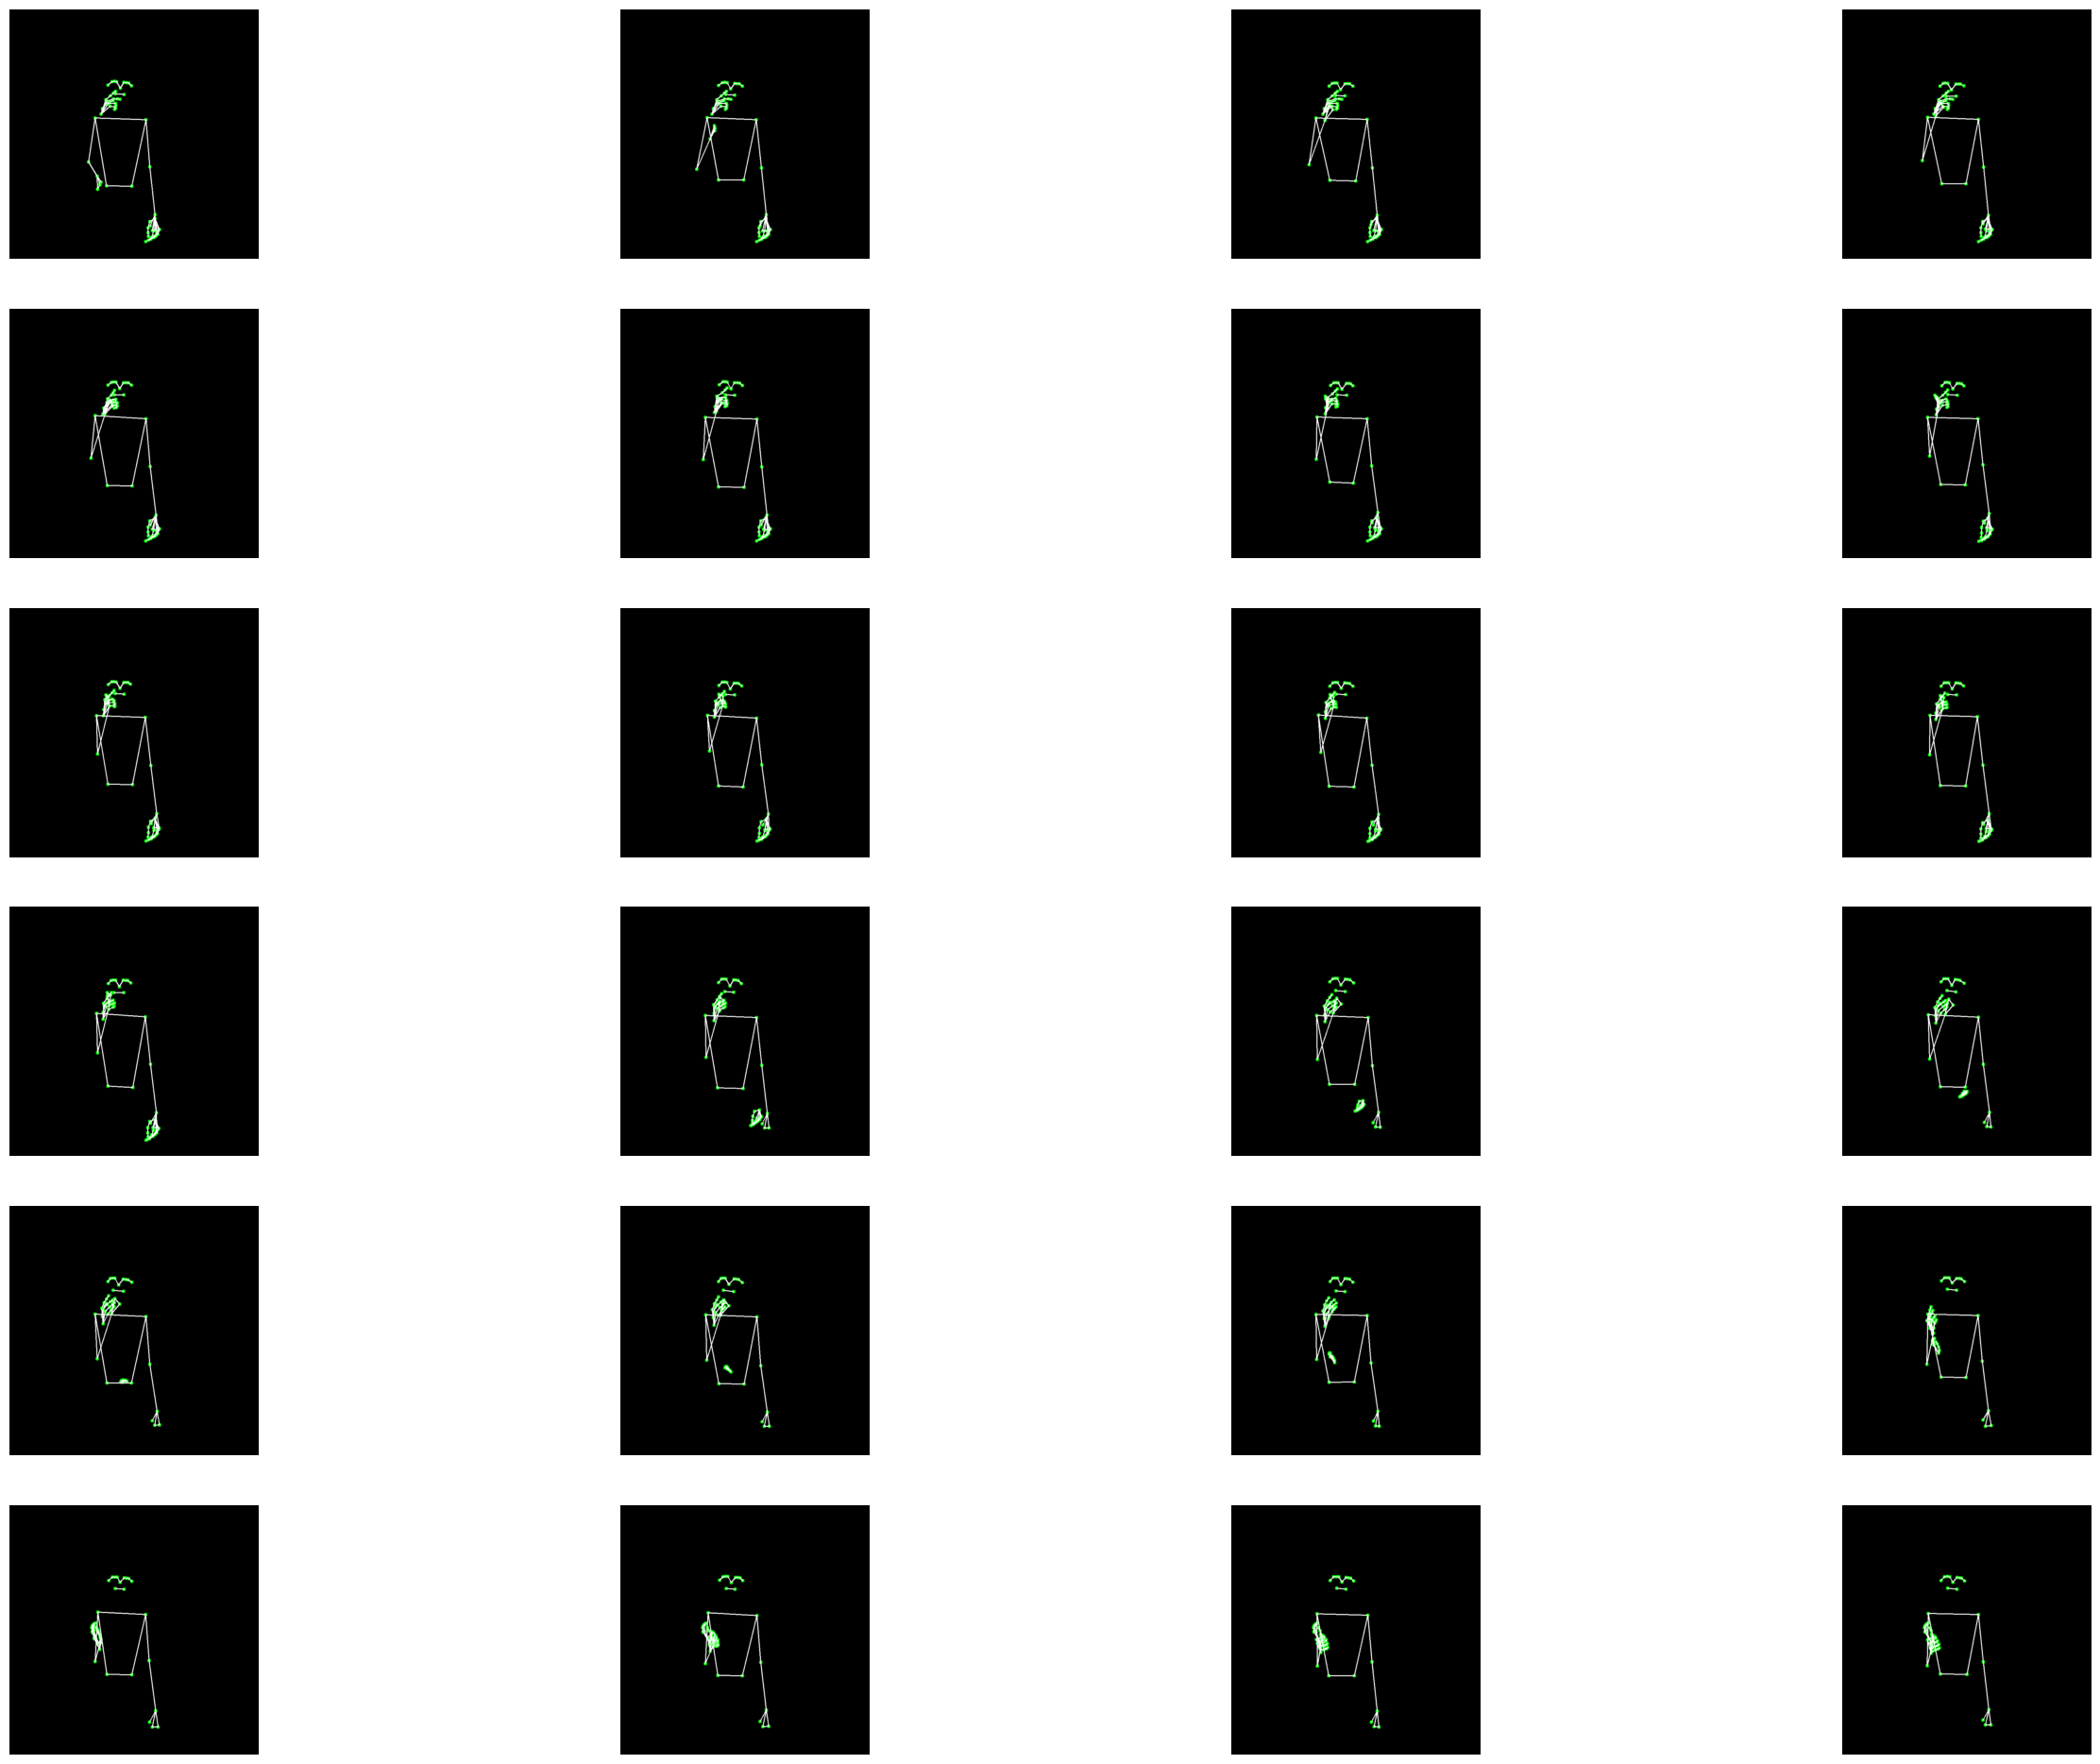

In [ ]:
show_sequence(vid[0], 24)

In [ ]:
vid.dtype  # uint8 so that it takes less space to store

torch.uint8

In [ ]:
def pickle_data(path, dataloader):
    for n, (X, y) in enumerate(dataloader):
        tensor_data = {
            'video': X,
            'label': y
        }

        torch.save(tensor_data, f'{path}\\tensor_{n}.pt')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Run this in two seperate notebooks so that train and test can be pickled simultaneously
pickle_data(r'D:\ISL_pickle\Train_data', train_dataloader)
pickle_data(r'D:\ISL_pickle\Test_data', test_dataloader)